In [1]:
import numpy as np
import matplotlib.pyplot as plt
from poles_roots.aaa import AAA
from poles_roots.plotting import phase_plot, plot_poles_zeros
from poles_roots import reference_problems
plt.style.use("/home/jakeb/development/poles-and-roots/notebooks/science.mplstyle")

In [2]:
z = np.exp(1j*2*np.pi*np.linspace(0,1, num=100))

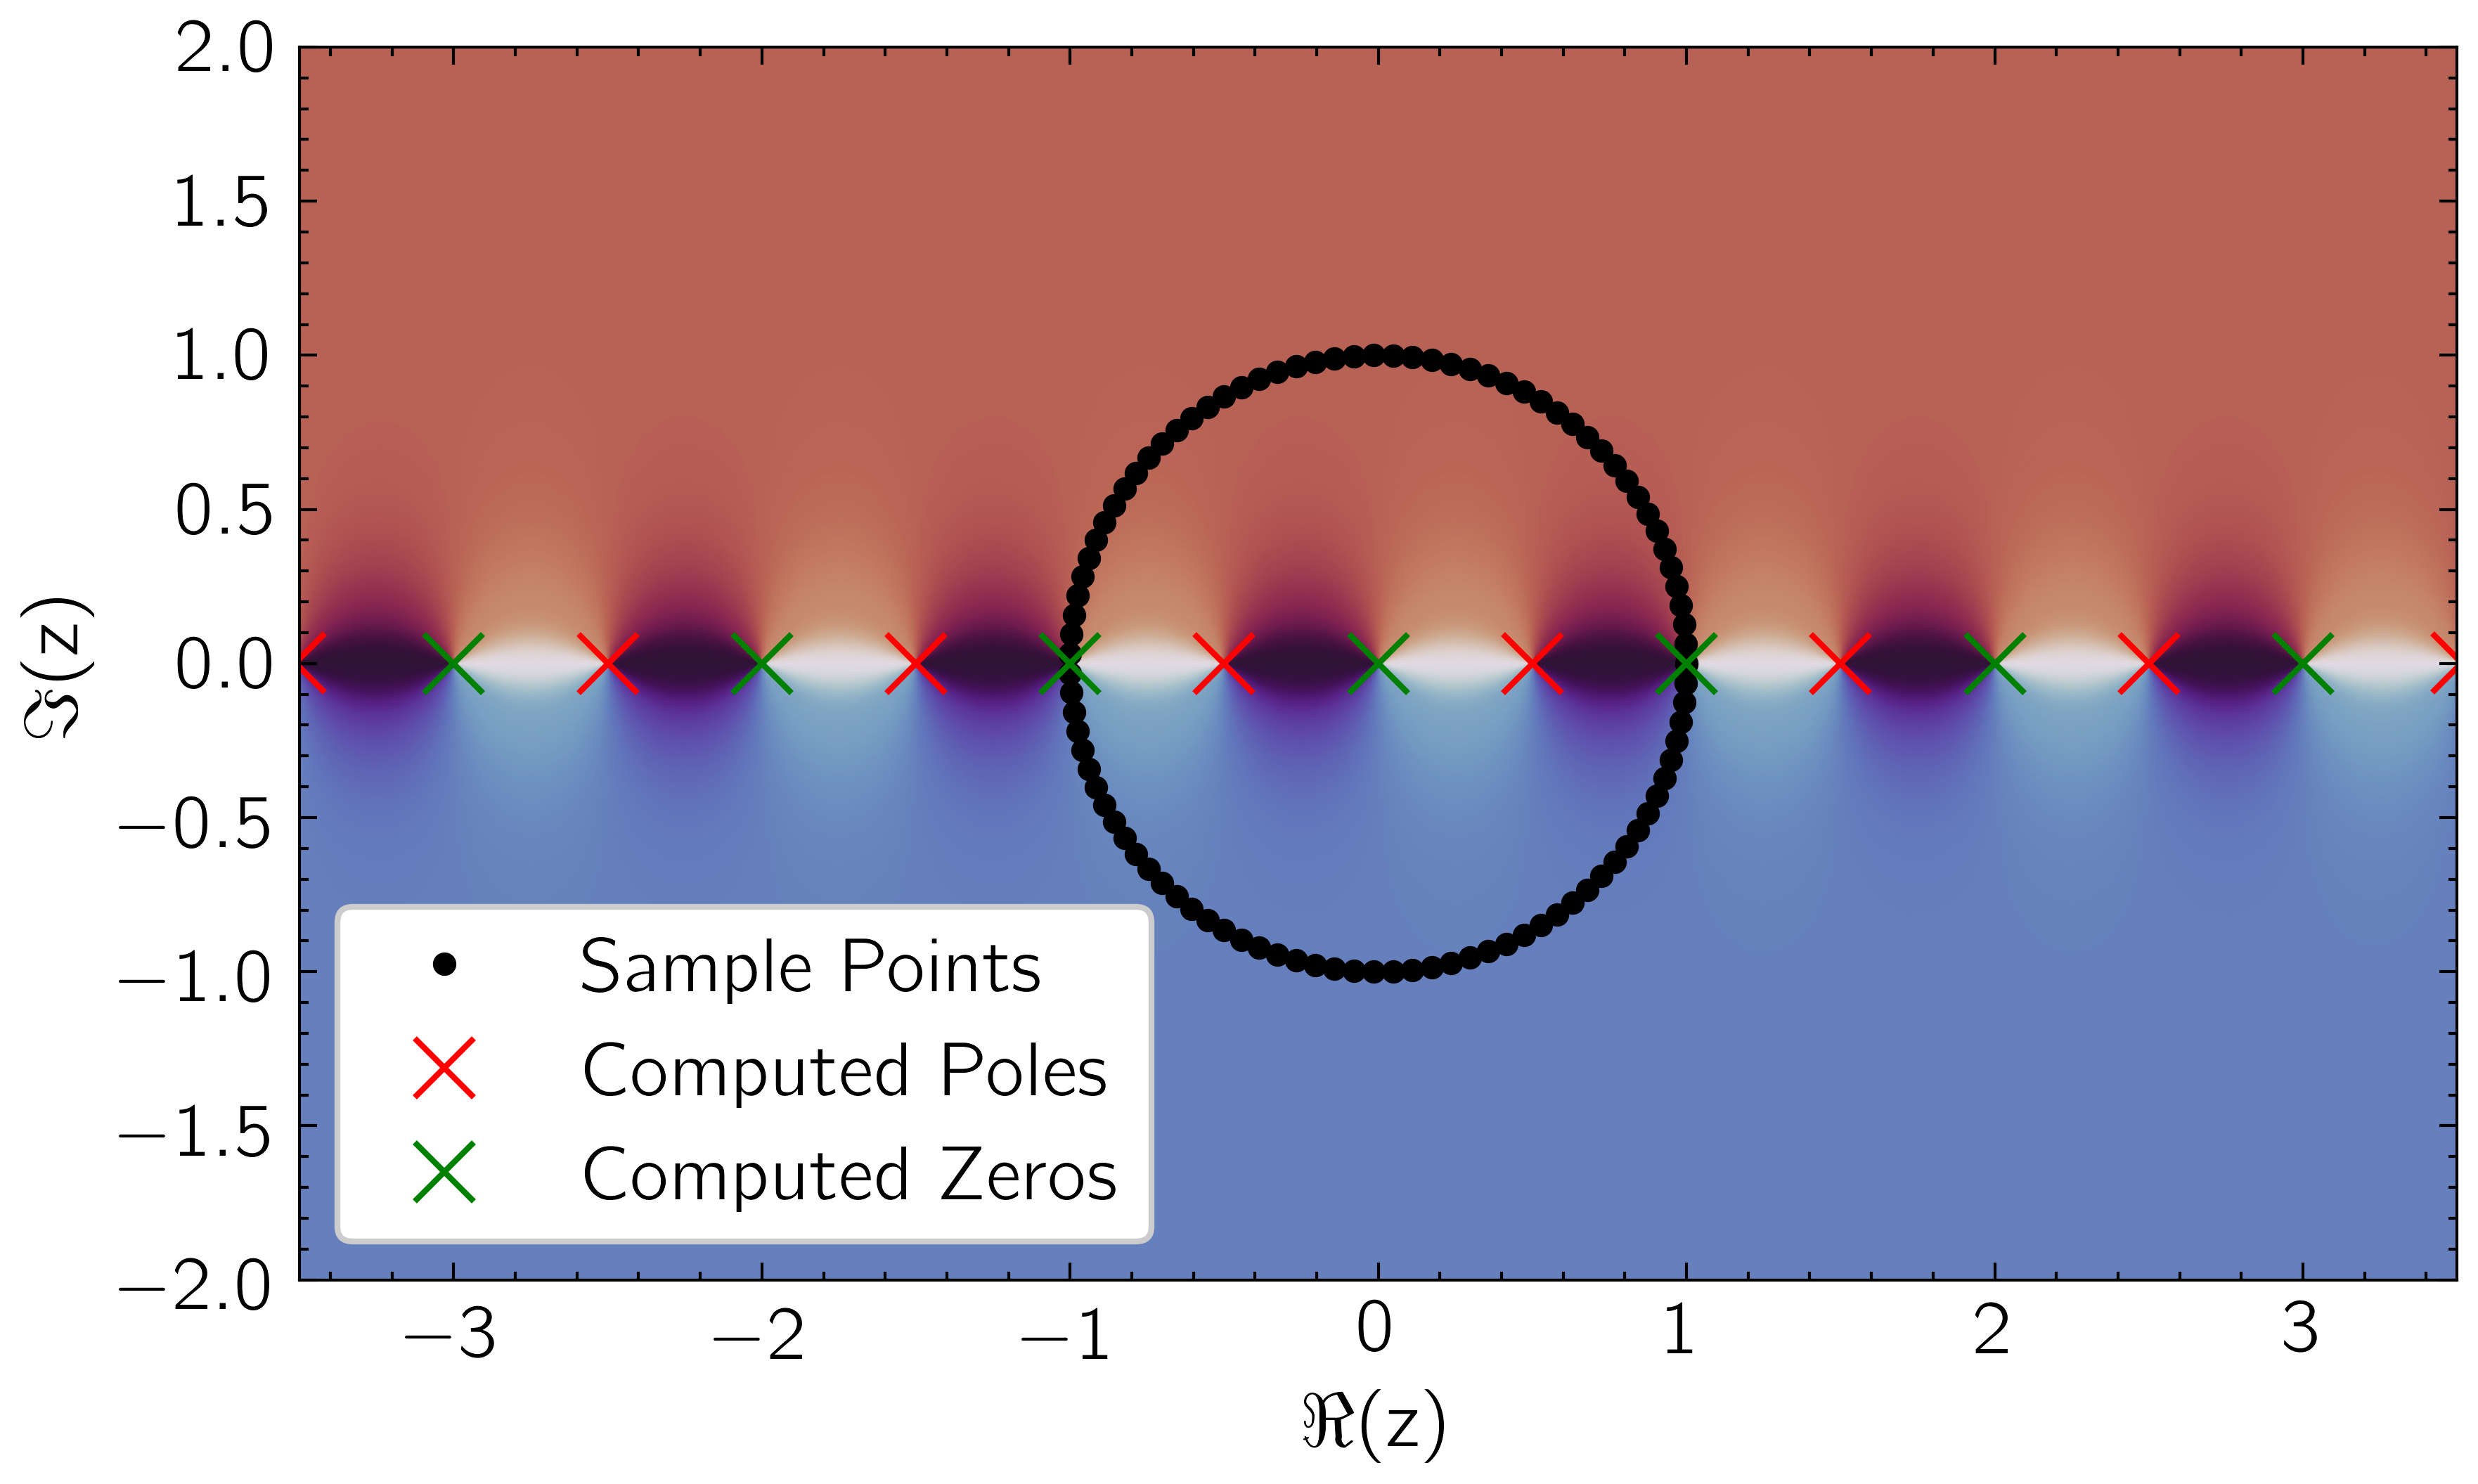

In [3]:
r = AAA(np.tan(z*np.pi), z)
fig, ax = plt.subplots(figsize=(6.6, 5))
ax.set_aspect('equal', 'box')
phase_plot(r, ax, domain=[-3.5, 3.5, -2, 2])
ax.plot(z.real, z.imag, '.', label="Sample Points")
plot_poles_zeros(r, ax)
ax.legend(facecolor='white', framealpha=1, frameon=True)
plt.savefig("figures/AAA_pole_zero.pdf")


/tmp/ipykernel_3150546/1998823943.py:8: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("figures/AAA_spurious_zero.pdf")


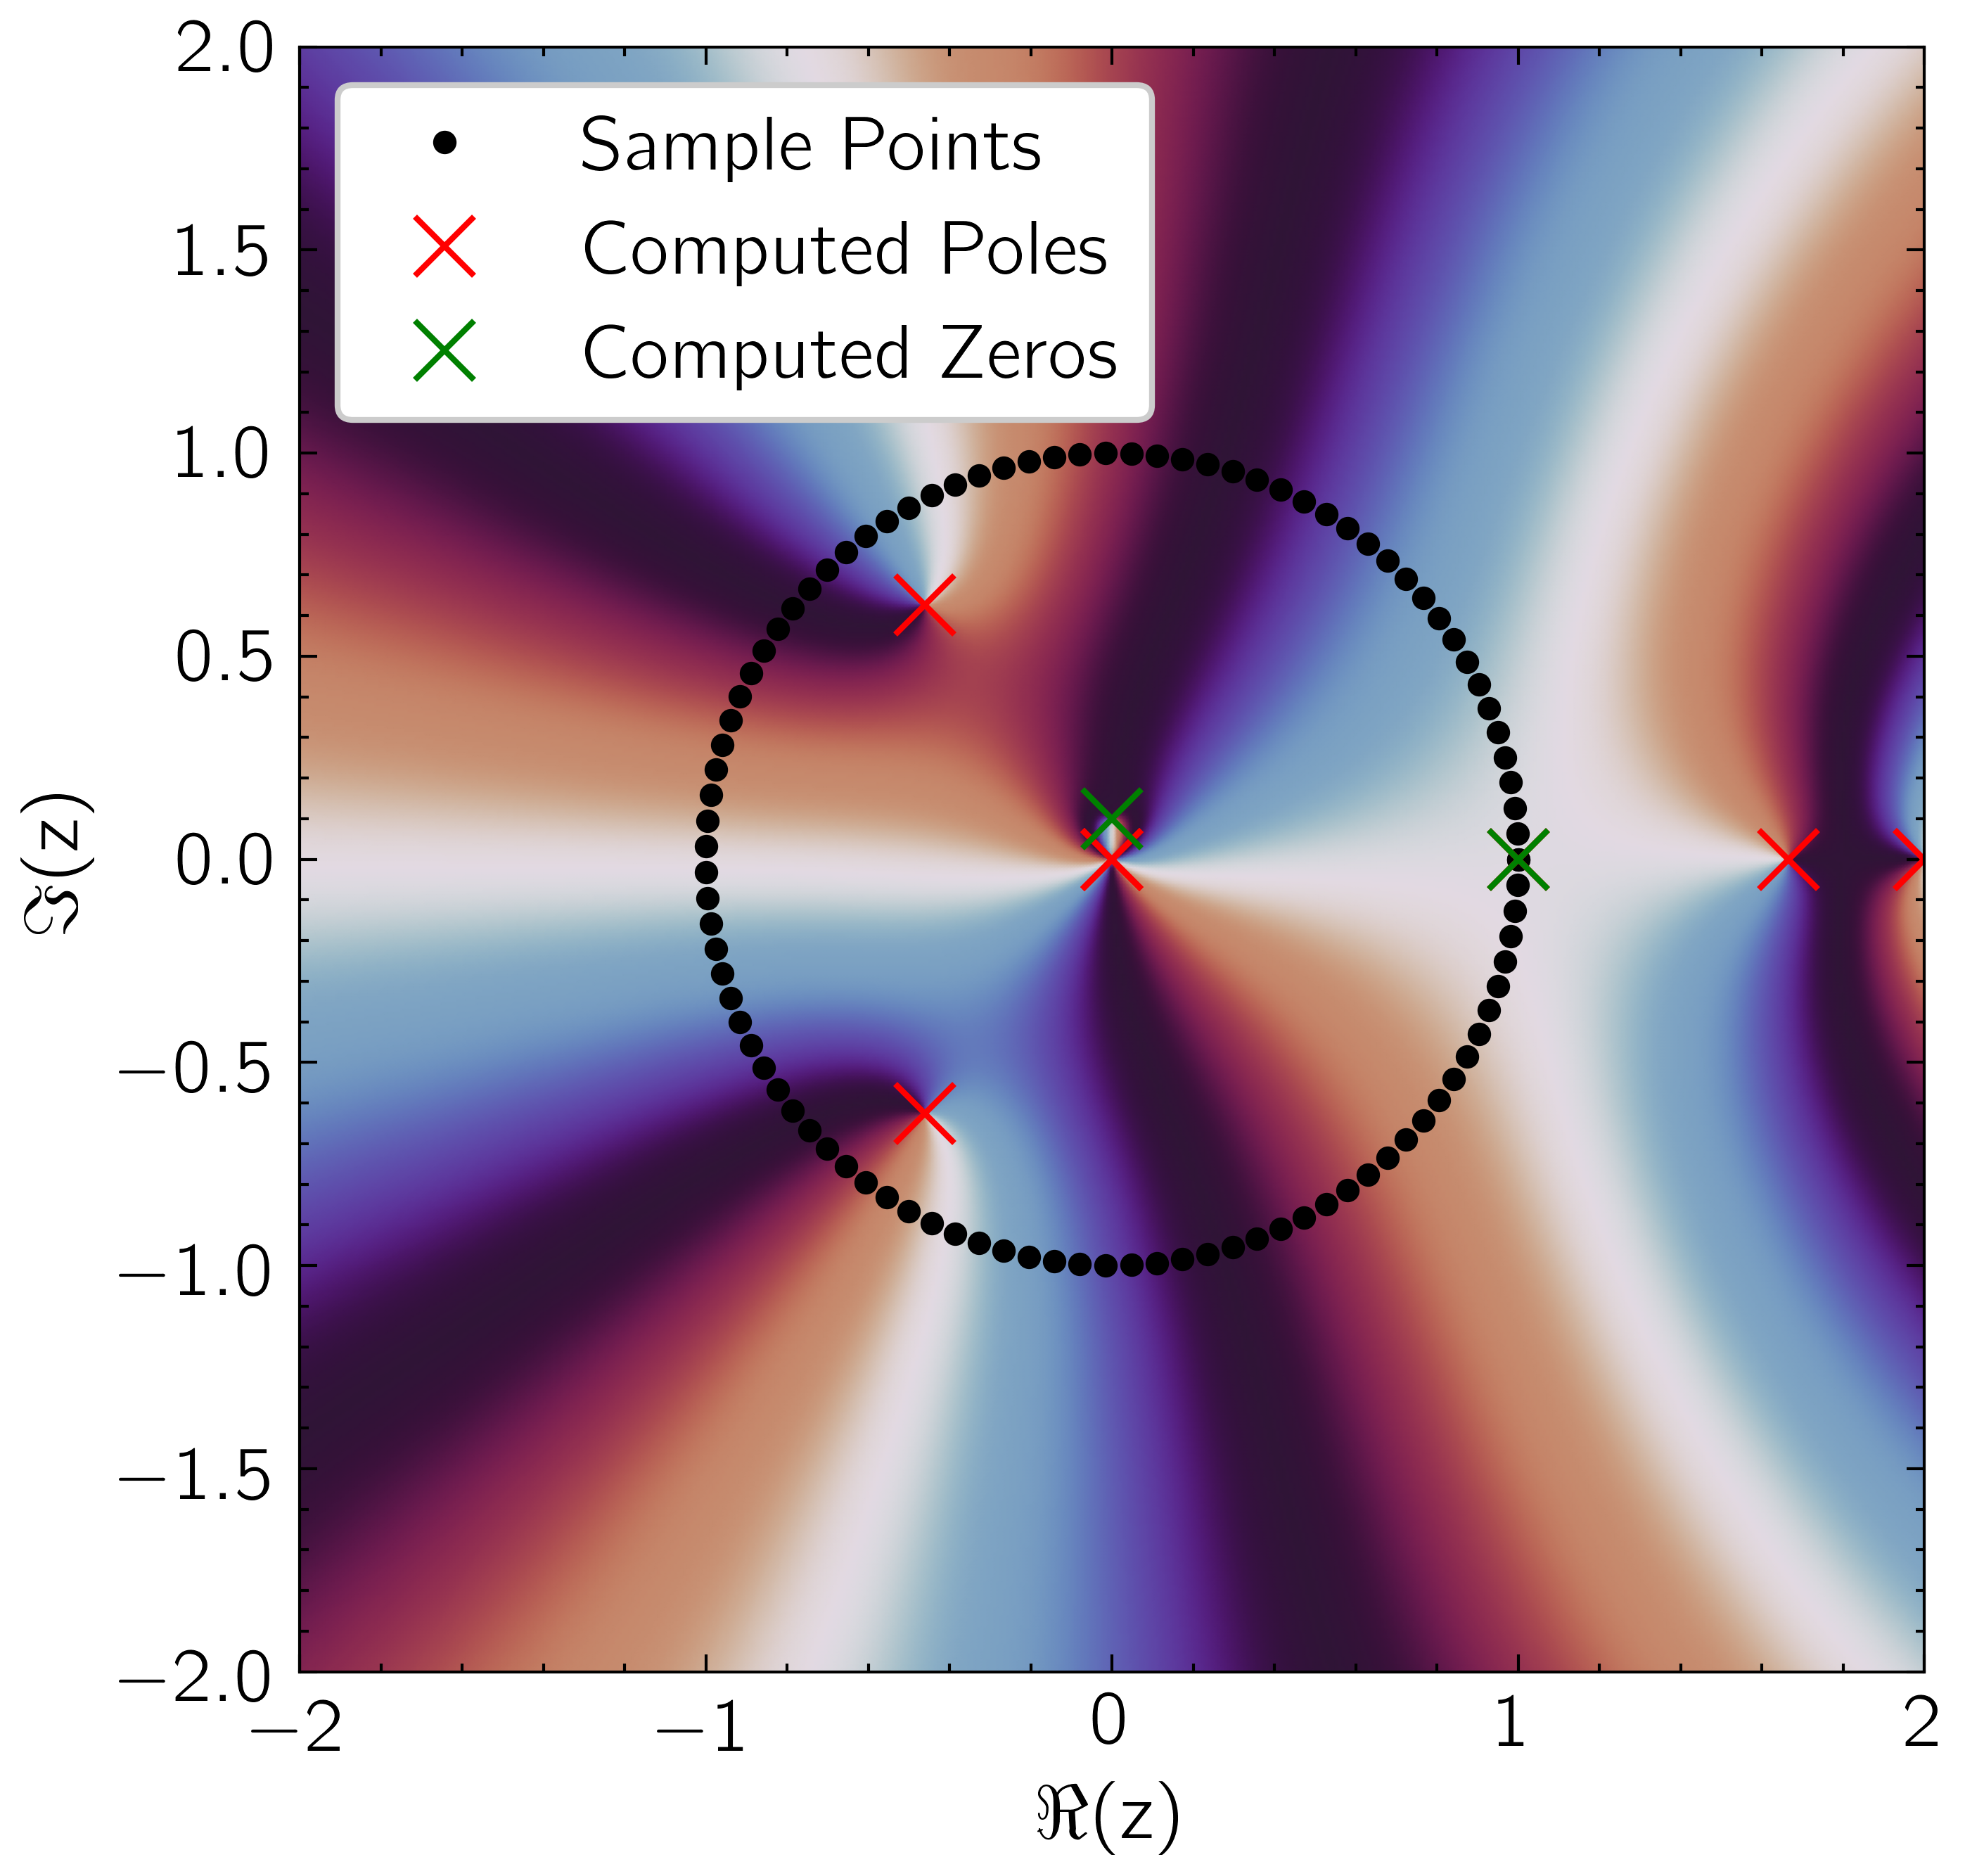

In [4]:
r = AAA((z-0.1j)/reference_problems.func4(z), z)
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_aspect('equal', 'box')
phase_plot(r, ax, domain=[-2, 2, -2, 2])
ax.plot(z.real, z.imag, '.', label="Sample Points")
plot_poles_zeros(r, ax)
ax.legend(facecolor='white', framealpha=1, frameon=True)
plt.savefig("figures/AAA_spurious_zero.pdf")


In [5]:
f = lambda z: (z-0.1j)/reference_problems.func4(z)

In [6]:
np.sort(r.roots)

array([-1.13694162e+01+4.95165172e+00j, -1.13188176e+01-5.01823446e+00j,
       -3.04467545e+00+6.37318496e+00j, -3.02356806e+00-6.44145438e+00j,
       -4.75469290e-14+1.00000000e-01j,  1.00000000e+00-4.54747235e-16j,
        2.49274975e+00-5.63794019e+00j,  2.52199630e+00+5.63178588e+00j,
        3.95753855e+00-4.19766926e+00j,  4.01433262e+00+4.18553558e+00j,
        4.95457203e+00-2.58320953e+00j,  5.06640409e+00+2.54133779e+00j,
        5.52186090e+00-2.69034204e-01j,  6.96241262e+00+7.06553241e-01j])

In [8]:
f(1.00000000e+00-4.47506550e-16j)

np.complex128(0.317374368085213-0.03173743680852126j)

In [9]:
r(1.00000000e+00-4.47506550e-16j)

array(0.31737437-0.03173744j)

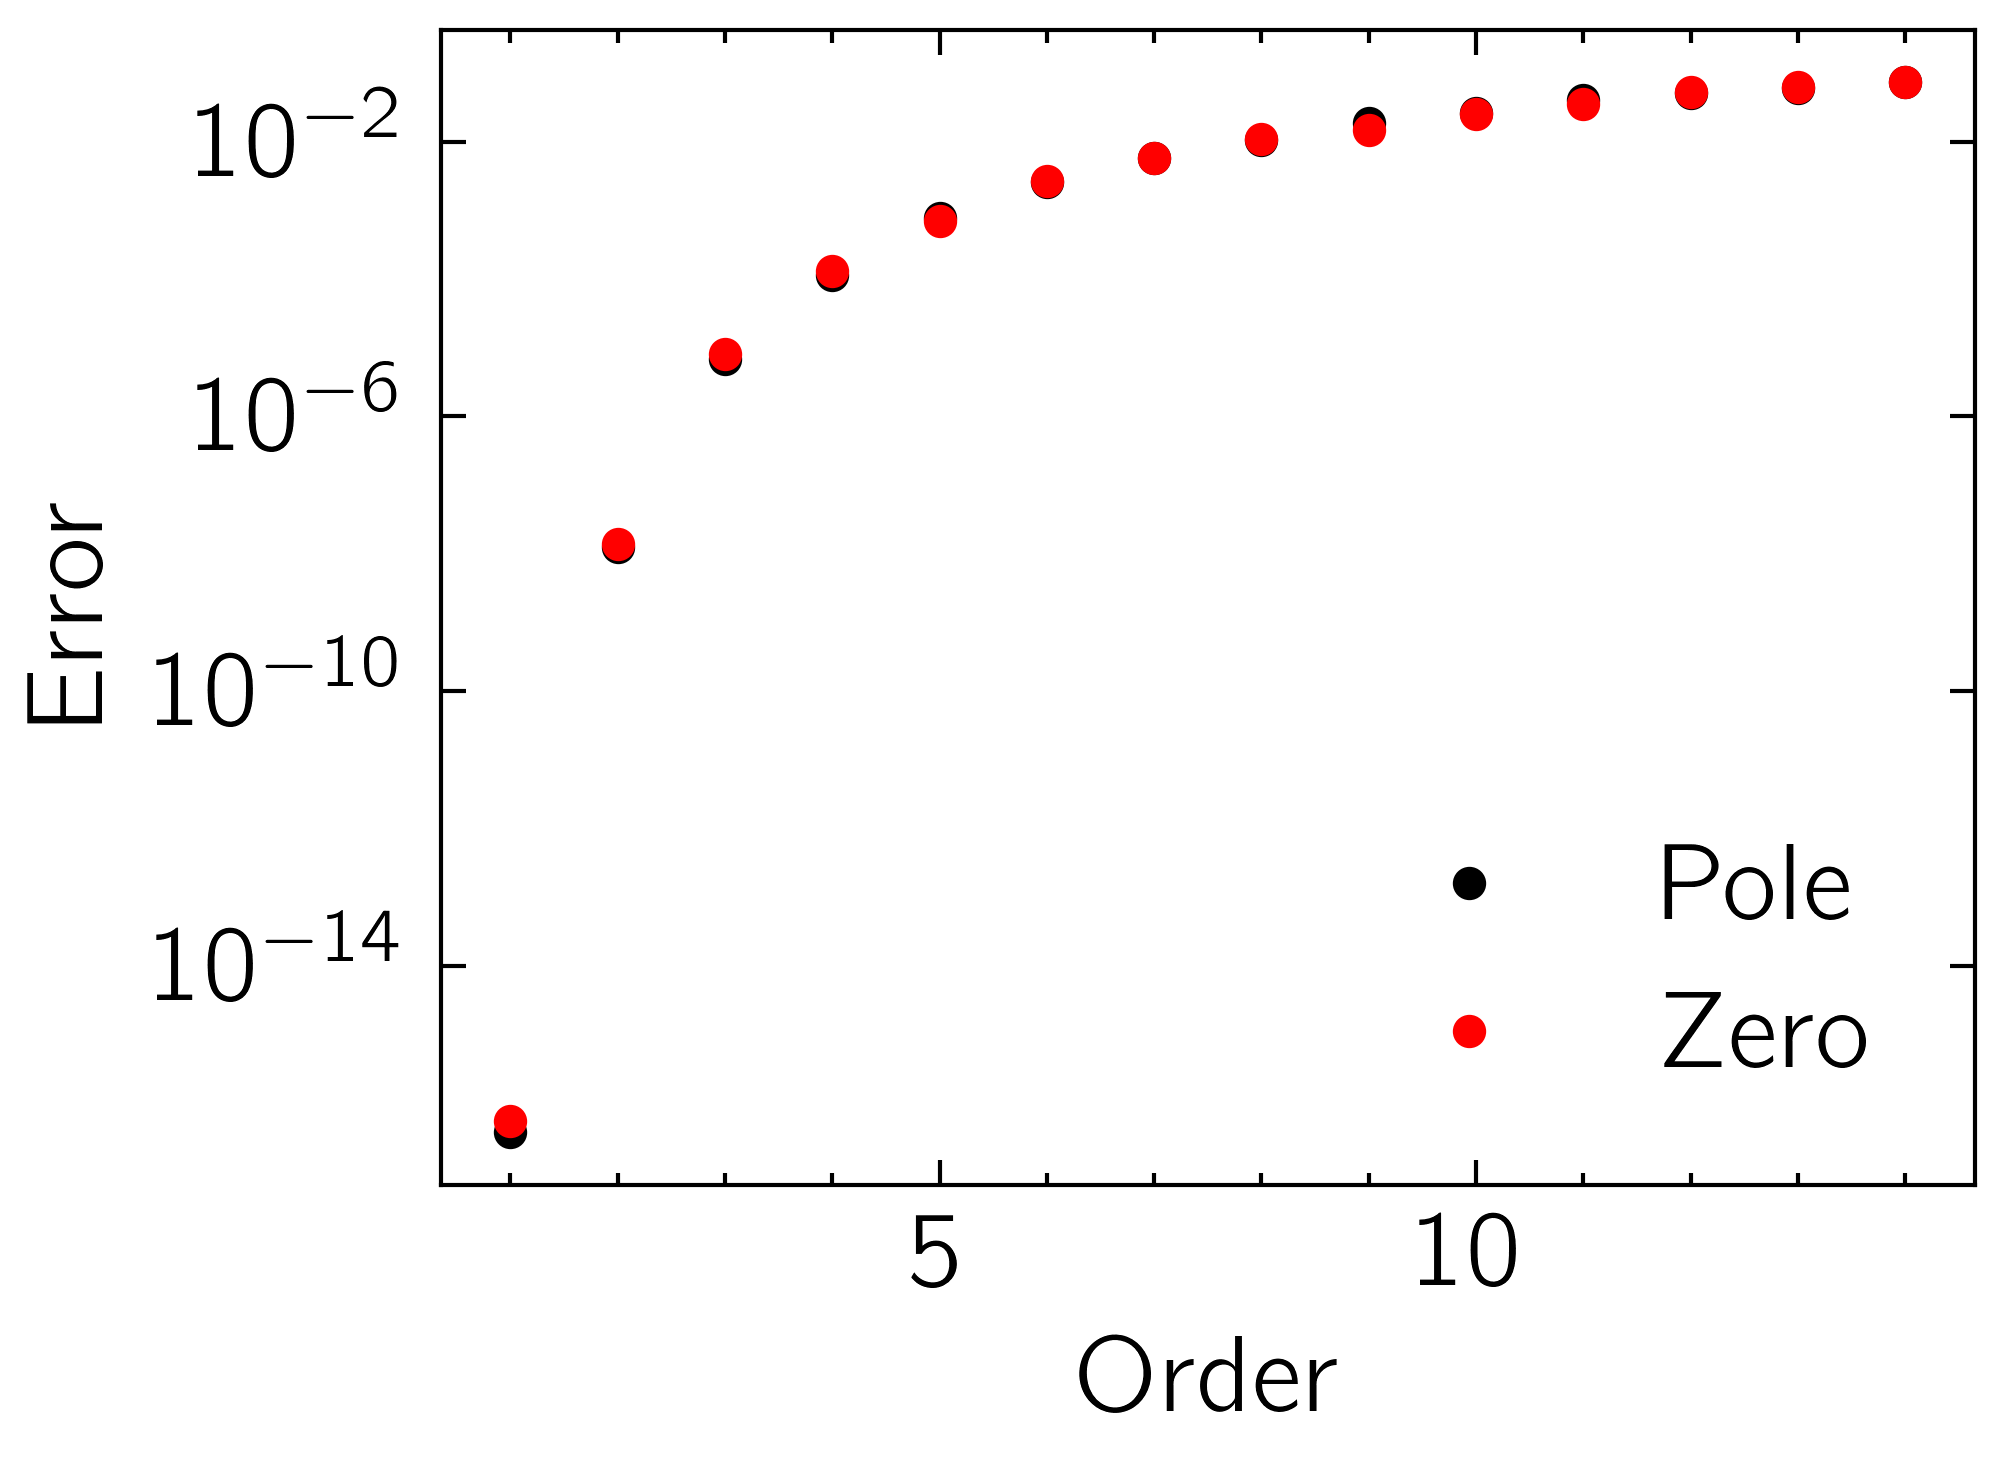

In [10]:
pole_errors = []
root_errors = []
orders = range(1,15)
for order in orders:
    def f_pole(z):
        return z**(-order)
    
    def f_root(z):
        return z**order
    
    pole_errors.append(np.min(np.abs(AAA(f_pole(z), z).poles)))
    root_errors.append(np.min(np.abs(AAA(f_root(z), z).roots)))
    
fig, ax = plt.subplots()
ax.plot(orders, pole_errors, '.', label="Pole")
ax.plot(orders, root_errors, '.', label="Zero")
ax.set_yscale('log')
ax.set_xlabel("Order")
ax.set_ylabel("Error")
ax.legend()
plt.savefig("figures/AAA_order.pdf")